# Geração de Números Pseudoaleatórios

Números aleatórios têm muitas aplicações na computação, como em simulações, amostragem estatística, criptografia e jogos de azar. No entanto, os computadores, por serem sistemas determinísticos, não podem gerar números realmente aleatórios de forma autônoma. Em vez disso, utilizam algoritmos determinísticos que geram números que parecem aleatórios, e esses números são chamados de pseudoaleatórios.

## O que é um número pseudoaleatório?

Um número pseudoaleatório é gerado a partir de uma fórmula matemática que, a partir de uma semente (um valor inicial), gera uma sequência de números que tem as propriedades desejadas de uma sequência aleatória. Essa sequência parece aleatória, mas se a mesma semente for usada, a sequência será a mesma.

## Geração de Números Pseudoaleatórios com o Gerador Linear Congruente (LCG)

[Link para o wikipedia](https://en.wikipedia.org/wiki/Linear_congruential_generator)


O **Gerador Linear Congruente** (LCG) é um dos métodos mais antigos e simples para gerar números pseudoaleatórios. Ele segue a fórmula:

$$
X_{n+1} = (a \cdot X_n + c) \mod m
$$

Onde:
- $X_n$ é o número atual (ou a semente inicial),
- $a$ é o multiplicador,
- $c$ é o incremento,
- $m$ é o módulo, ou seja, o intervalo dos números gerados.

A sequência gerada pelo LCG depende diretamente dos parâmetros $a$, $c$, $m$ e da semente inicial $X_0$. Um conjunto mal escolhido de parâmetros pode resultar em uma sequência com um período curto, o que compromete a aleatoriedade da sequência.


### O que é a Função Módulo?

A **função módulo** (também conhecida como operação de resto) retorna o **resto da divisão** de um número por outro. Em termos matemáticos, para dois números inteiros $a$ e $b$, a operação módulo é representada como:

$$
r = a \mod b
$$

Onde:
- $a$ é o dividendo,
- $b$ é o divisor,
- $r$ é o resto da divisão de $a$ por $b$.

Por exemplo, se temos $a = 17$ e $b = 5$, a divisão de 17 por 5 dá 3 com um resto de 2, então:

$$
17 \mod 5 = 2
$$

No contexto do **Gerador Linear Congruente (LCG)**, a função módulo é usada para garantir que os números gerados fiquem dentro de um intervalo específico, geralmente entre 0 e $m-1$, onde $m$ é o módulo definido no algoritmo.


In [16]:
# Exemplo de uso da função módulo em Python

# Definindo os valores
a = 17
b = 3

# Calculando o módulo de a por b
resto = a % b

# Exibindo o resultado
print(f"O resultado de {a} % {b} é: {resto}")


O resultado de 17 % 3 é: 2


## Por que o Gerador Linear Congruente Funciona?

O Gerador Linear Congruente (LCG) é um dos métodos mais simples e eficientes para gerar números pseudoaleatórios. Sua eficácia se baseia em um bom equilíbrio entre a escolha dos parâmetros (multiplicador $a$, incremento $c$, módulo $m$ e semente inicial $X_0$) e as propriedades matemáticas que garantem uma sequência suficientemente "aleatória". Para que o LCG funcione bem, os parâmetros precisam ser cuidadosamente selecionados para garantir que a sequência gerada tenha um período longo, seja bem distribuída e evite padrões repetitivos.

### A Fórmula do LCG

A fórmula básica do LCG é:

$$
X_{n+1} = (a \cdot X_n + c) \mod m
$$

Onde:
- $X_n$ é o número gerado na $n$-ésima iteração,
- $a$ é o multiplicador,
- $c$ é o incremento,
- $m$ é o módulo,
- $X_0$ é a semente inicial.

O número gerado em cada iteração é o **resto da divisão** de $(a \cdot X_n + c)$ por $m$. Essa operação garante que os números fiquem dentro do intervalo $[0, m-1]$. A normalização posterior geralmente transforma esses números em valores no intervalo $[0, 1)$.

### O Papel de $m$

O valor de $m$, conhecido como módulo, define o intervalo no qual os números gerados estarão contidos. Em muitos casos, $m$ é escolhido como uma potência de 2 (por exemplo, $m = 2^{32}$ ou $m = 2^{64}$) porque cálculos modulares com potências de 2 são mais rápidos em hardware.

A escolha de $m$ também influencia o **período máximo** da sequência. Se todos os parâmetros forem escolhidos corretamente, o LCG pode gerar uma sequência com o período máximo, que é $m$. Isso significa que a sequência não repetirá nenhum número até que $m$ números tenham sido gerados.

### O Papel de $a$, $c$ e a Condição de Coprimos

Para garantir que o gerador tenha o período máximo (ou seja, $m$ números diferentes antes de repetir a sequência), a escolha dos parâmetros $a$ (multiplicador), $c$ (incremento) e $m$ (módulo) deve satisfazer as seguintes condições baseadas em **teorias de números**:

1. **O incremento $c$ deve ser coprimo com $m$**:
   - Dois números são **coprimos** se o maior divisor comum deles for 1, ou seja, $\text{gcd}(c, m) = 1$. Isso garante que, ao somar $c$, todos os possíveis valores de $X_n$ possam ser atingidos antes de repetir a sequência.
   - Se $c$ não for coprimo com $m$, a sequência gerada pode pular certos valores, resultando em um período mais curto do que o esperado.

2. **O valor de $a - 1$ deve ser divisível por todos os fatores primos de $m$**:
   - Se $m$ é uma potência de 2 (por exemplo, $m = 2^k$), a escolha de $a$ deve ser tal que $(a - 1)$ seja divisível por 2 para garantir que o período seja maximizado.

3. **Se $m$ for divisível por 4, então $(a - 1)$ também deve ser divisível por 4**:
   - Isso é necessário para garantir que todos os resíduos modulares possíveis possam ser gerados, especialmente quando $m$ é uma potência de 2.

### Exemplo de uma Escolha Correta de Parâmetros

Um exemplo clássico de um bom conjunto de parâmetros é:

- $m = 2^{32}$ (módulo com 32 bits),
- $a = 1664525$ (multiplicador),
- $c = 1013904223$ (incremento),
- $X_0 = 42$ (semente inicial, que pode ser qualquer valor).

Esses parâmetros foram escolhidos para garantir que o LCG tenha um longo período e uma boa distribuição dos números gerados. O módulo $m = 2^{32}$ é uma potência de 2, o que torna as operações modulares mais rápidas, e os valores de $a$ e $c$ satisfazem as condições matemáticas para maximizar o período.

In [24]:
import math

# Parâmetros do exemplo
m = 2**32
a = 1664525
c = 1013904223

# Verificando as condições
# 1. O incremento c deve ser coprimo com m
coprimo_c_m = math.gcd(c, m) == 1

# 2. a - 1 deve ser divisível por todos os fatores primos de m
a_menos_1 = a - 1

print(a_menos_1)

# Verificando se a - 1 é divisível por 2 (único fator primo de m = 2^32)
divisivel_por_2 = (a_menos_1 % 2 == 0)

# 3. Se m for divisível por 4, a - 1 também deve ser divisível por 4
divisivel_por_4 = (a_menos_1 % 4 == 0)

coprimo_c_m, divisivel_por_2, divisivel_por_4


1664524


(True, True, True)

### Por que o LCG Funciona Bem?

O LCG funciona porque:
- **As operações modulares** garantem que os números gerados estejam dentro de um intervalo fixo e possam cobrir todo o espaço de possíveis valores de maneira ordenada.
- **A escolha adequada dos parâmetros** garante que a sequência tenha um longo período (o maior possível dado $m$), evita padrões repetitivos e assegura que a sequência seja **pseudoaleatória** o suficiente para muitas aplicações, como simulações e métodos de Monte Carlo.

No entanto, o LCG pode não ser adequado para todas as aplicações, especialmente em criptografia, onde a previsibilidade é um problema. Para a maioria dos usos científicos e de simulação, ele ainda é uma escolha eficiente e simples.

### Efeito dos Parâmetros no Gerador Linear Congruente (LCG)

Os parâmetros no Gerador Linear Congruente (LCG) têm um impacto significativo sobre a qualidade e as propriedades da sequência de números pseudoaleatórios gerados. Os parâmetros principais são:

1. **Multiplicador $a$**: 
   - Esse parâmetro é essencial para garantir que a sequência de números gerados tenha um bom período (o número de valores distintos antes de a sequência começar a se repetir). Se o valor de $a$ não for bem escolhido, o período da sequência pode ser curto e a qualidade dos números gerados diminui.
   - Bons valores de $a$ são cruciais para evitar padrões repetitivos ou ciclos curtos.

2. **Incremento $c$**: 
   - O incremento $c$ adiciona um valor fixo à sequência e é um dos fatores que pode garantir que todos os valores no intervalo $[0, m)$ sejam atingidos em algum momento, desde que os outros parâmetros também sejam bem escolhidos.
   - Quando $c = 0$, o gerador é chamado de **multiplicativo**. Nessa forma, o LCG pode ter um comportamento menos uniforme.

3. **Módulo $m$**: 
   - O módulo define o intervalo dos números gerados. Comumente, $m$ é escolhido como uma potência de 2 (por exemplo, $m = 2^{32}$) para facilitar os cálculos modulares em hardware e software.
   - O valor de $m$ também determina o período máximo da sequência de números. Com um módulo de $m$, o período máximo teórico que o LCG pode ter é $m$, mas isso depende da escolha correta dos parâmetros $a$ e $c$.

4. **Semente $X_0$**: 
   - A semente é o valor inicial de $X_0$ usado pelo LCG para iniciar a sequência. Mudar a semente resultará em uma sequência diferente, mas com o mesmo período e comportamento determinado pelos outros parâmetros.
   - A semente garante que o algoritmo possa ser **reproduzido**. Se dois programas utilizarem a mesma semente com os mesmos parâmetros, ambos produzirão a mesma sequência de números.

### Impacto dos Parâmetros:

1. **Período da Sequência**:
   - O período é a quantidade de números gerados antes que a sequência comece a se repetir. Para obter o período máximo, os parâmetros $a$, $c$, $m$ e a semente $X_0$ precisam ser cuidadosamente escolhidos.
   - Se os parâmetros não forem bons, o gerador pode produzir uma sequência com um ciclo muito curto ou, pior, um conjunto pequeno de valores.

2. **Distribuição dos Números**:
   - Embora o LCG gere números no intervalo $[0, 1)$, o quão bem distribuídos esses números estão nesse intervalo depende dos parâmetros.
   - Parâmetros mal escolhidos podem causar uma distribuição não uniforme, onde certos intervalos terão mais números gerados que outros, levando a um comportamento indesejável.

3. **Padrões Repetitivos**:
   - Se os parâmetros forem mal escolhidos, podem surgir padrões repetitivos que comprometem a aleatoriedade dos números. Esses padrões tornam o LCG inadequado para algumas aplicações, como criptografia ou simulações que exigem alta qualidade de aleatoriedade.

Por essas razões, a escolha dos parâmetros $a$, $c$, $m$ e da semente $X_0$ é crítica para garantir que o LCG produza números pseudoaleatórios de alta qualidade e com um período longo.


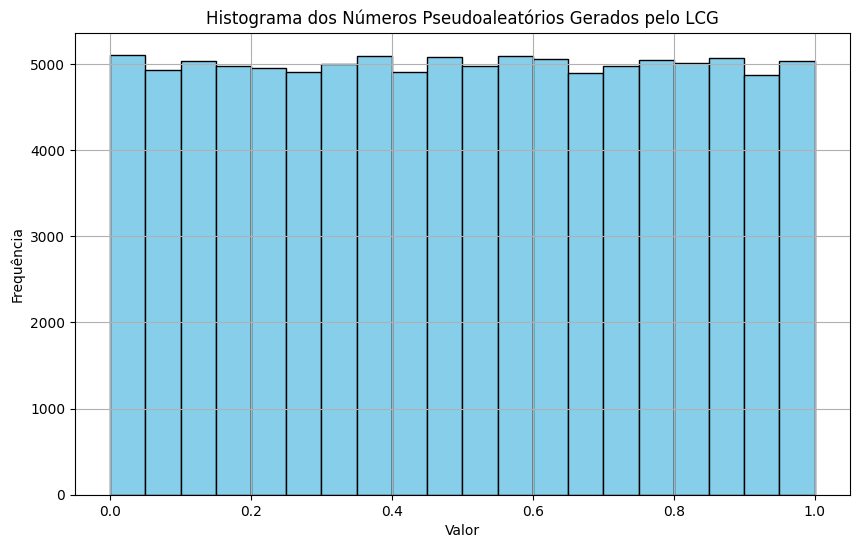

In [13]:
import matplotlib.pyplot as plt

class LinearCongruentialGenerator:
    def __init__(self, semente, a=1103515245, c=12345, m=2**32):
        self.a = a
        self.c = c
        self.m = m
        self.semente = semente

    def gerar(self):
        # Atualizando a semente
        self.semente = (self.a * self.semente + self.c) % self.m
        return self.semente / self.m  # Normalizando para [0, 1)

# Inicializando o gerador com uma semente
lcg = LinearCongruentialGenerator(semente=5)

# Gerando 1000 números pseudoaleatórios
numeros_gerados = [lcg.gerar() for _ in range(100000)]

# Plotando o histograma dos números gerados
plt.figure(figsize=(10, 6))
plt.hist(numeros_gerados, bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma dos Números Pseudoaleatórios Gerados pelo LCG')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


## Gerando números uniformes com uma moeda

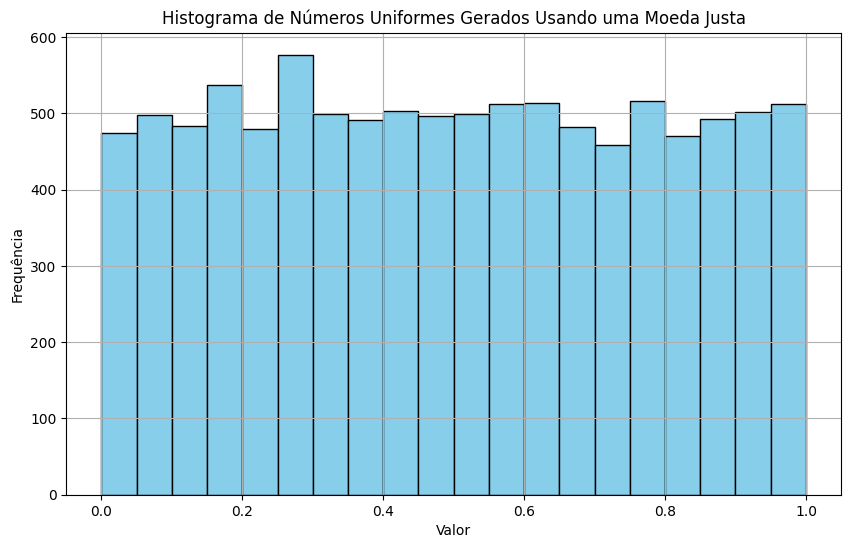

In [20]:
import random
import matplotlib.pyplot as plt

# Função para simular o lançamento de uma moeda justa
def lancar_moeda():
    # Lançar moeda justa: 0 para coroa (K) e 1 para cara (C)
    return random.choice([0, 1])

# Função para gerar um número uniformemente distribuído usando uma moeda
def gerar_numero_uniforme(n_bits=32):
    numero = 0
    for i in range(n_bits):
        bit = lancar_moeda()
        # Atualizando o número, multiplicando pela base 2
        numero += bit * (2 ** -(i + 1))  # Cada bit tem um peso de 2^-(posição)
    return numero

# Gerando 1000 números uniformemente distribuídos
numeros_uniformes = [gerar_numero_uniforme() for _ in range(10000)]

# Plotando o histograma dos números gerados
plt.figure(figsize=(10, 6))
plt.hist(numeros_uniformes, bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Números Uniformes Gerados Usando uma Moeda Justa')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()
